In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

from tensorflow.keras import metrics

In [2]:
import tensorflow
print(tensorflow.__version__)

2.5.0


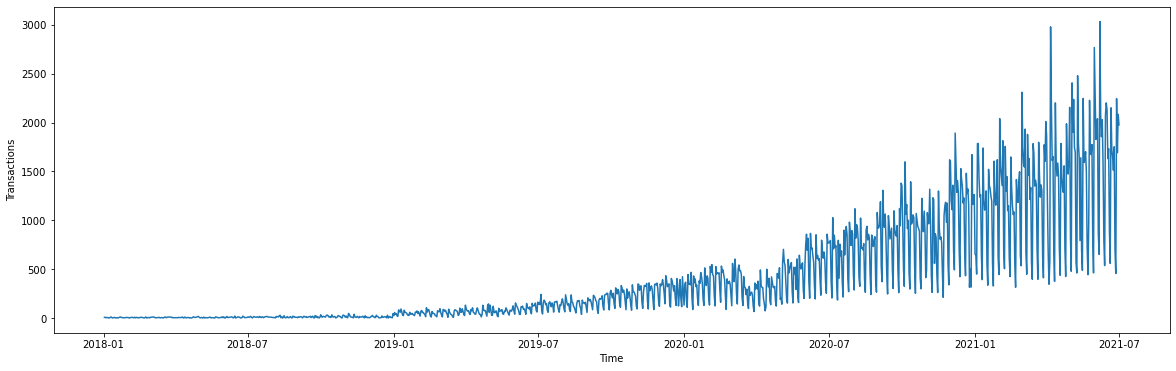

In [3]:
# transform the data into the right format
trs = pd.read_csv("data/transactions.csv")
trs['date'] = pd.to_datetime(trs['date'])
trs['date'] = pd.to_datetime(trs['date'])
t2day = trs['date'].value_counts().sort_values()
t2day = t2day.to_frame()
series = X = t2day.date.sort_index().values



# visualize the data to be sure about it. 
plt.figure(figsize = (20, 6))
plt.xlabel("Time")
plt.ylabel("Transactions")

plt.plot(t2day.date.sort_index())
plt.show()

In [13]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps
n_steps_in, n_steps_out = 90, 10

# split into samples
X, y = split_sequence(series, n_steps_in, n_steps_out)

count = 0
for i in range(len(X)):
    print(X[i], y[i])
    count += 1
    if count > 2: break
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[ 7  8  3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7
  6  1  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8
 12  7  2  4  4  7  2  4  5  4  1  6 11  8  3 10 10 10 10  3  6  4  4  4
  7  5  6 11  3  1 10  6  1  6  6  5  1  4  1  2  7 13] [ 8  7  7 17  3  2  7  2  2 10]
[ 8  3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7  6
  1  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8 12
  7  2  4  4  7  2  4  5  4  1  6 11  8  3 10 10 10 10  3  6  4  4  4  7
  5  6 11  3  1 10  6  1  6  6  5  1  4  1  2  7 13  8] [ 7  7 17  3  2  7  2  2 10  1]
[ 3  7  4  1  5 11  8  1  7  1  2  4  1 12  6  6  4  4  2  6  6  7  6  1
  7  7  5  3  9  2  8  3  3  8  6  3  1  4 12  2  2  7  4  2  9  8 12  7
  2  4  4  7  2  4  5  4  1  6 11  8  3 10 10 10 10  3  6  4  4  4  7  5
  6 11  3  1 10  6  1  6  6  5  1  4  1  2  7 13  8  7] [ 7 17  3  2  7  2  2 10  1  4]


In [14]:
split_size = int(len(X)* 0.75)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:],y[split_size:]

### Define a Convolutional Neural Network 

In [15]:
# define model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(100, activation='relu')) 
model.add(Dense(n_steps_out)) 
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X_train, y_train, validation_split=0.33,batch_size=64, epochs=150, verbose=2)

Epoch 1/150
9/9 - 1s - loss: 4832.1479 - val_loss: 58409.6289
Epoch 2/150
9/9 - 0s - loss: 1720.6923 - val_loss: 38021.6562
Epoch 3/150
9/9 - 0s - loss: 1143.3040 - val_loss: 24743.3164
Epoch 4/150
9/9 - 0s - loss: 843.5424 - val_loss: 27506.4414
Epoch 5/150
9/9 - 0s - loss: 694.2554 - val_loss: 19535.6758
Epoch 6/150
9/9 - 0s - loss: 585.2569 - val_loss: 17901.4746
Epoch 7/150
9/9 - 0s - loss: 545.8530 - val_loss: 22418.0195
Epoch 8/150
9/9 - 0s - loss: 510.3541 - val_loss: 15883.7754
Epoch 9/150
9/9 - 0s - loss: 484.9112 - val_loss: 18621.5020
Epoch 10/150
9/9 - 0s - loss: 477.7534 - val_loss: 20291.2910
Epoch 11/150
9/9 - 0s - loss: 469.0034 - val_loss: 15848.7949
Epoch 12/150
9/9 - 0s - loss: 433.7796 - val_loss: 18912.4102
Epoch 13/150
9/9 - 0s - loss: 427.2365 - val_loss: 16995.8750
Epoch 14/150
9/9 - 0s - loss: 422.1857 - val_loss: 17335.5977
Epoch 15/150
9/9 - 0s - loss: 415.3445 - val_loss: 17481.3535
Epoch 16/150
9/9 - 0s - loss: 400.9361 - val_loss: 15014.9180
Epoch 17/150
9

Epoch 133/150
9/9 - 0s - loss: 199.9998 - val_loss: 14337.9453
Epoch 134/150
9/9 - 0s - loss: 197.4390 - val_loss: 14813.0254
Epoch 135/150
9/9 - 0s - loss: 200.4853 - val_loss: 14475.4355
Epoch 136/150
9/9 - 0s - loss: 193.9559 - val_loss: 14716.1924
Epoch 137/150
9/9 - 0s - loss: 191.2724 - val_loss: 14258.4893
Epoch 138/150
9/9 - 0s - loss: 190.6410 - val_loss: 14202.1992
Epoch 139/150
9/9 - 0s - loss: 191.5868 - val_loss: 14586.6768
Epoch 140/150
9/9 - 0s - loss: 191.3160 - val_loss: 14536.6387
Epoch 141/150
9/9 - 0s - loss: 194.7138 - val_loss: 15271.1016
Epoch 142/150
9/9 - 0s - loss: 192.9523 - val_loss: 14791.0479
Epoch 143/150
9/9 - 0s - loss: 187.7943 - val_loss: 14239.1191
Epoch 144/150
9/9 - 0s - loss: 181.9496 - val_loss: 15018.2812
Epoch 145/150
9/9 - 0s - loss: 182.5352 - val_loss: 15029.4131
Epoch 146/150
9/9 - 0s - loss: 179.8485 - val_loss: 14356.2305
Epoch 147/150
9/9 - 0s - loss: 179.8129 - val_loss: 16332.6865
Epoch 148/150
9/9 - 0s - loss: 190.6655 - val_loss: 138

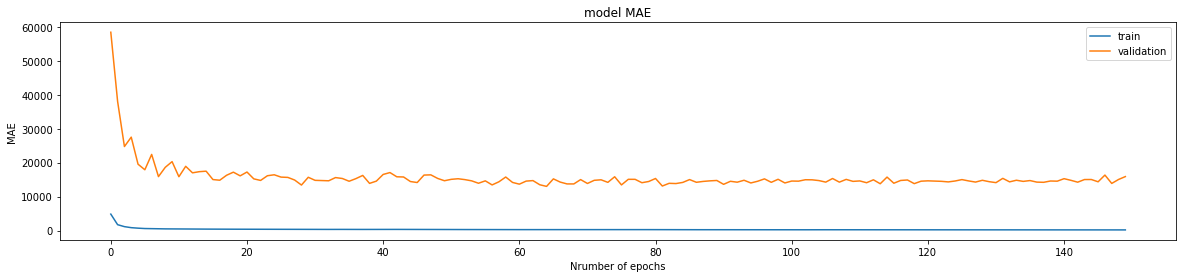

In [16]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('Nrumber of epochs')
plt.legend(["train", "validation"], loc ="upper right")
plt.show()

In [17]:
# demonstrate prediction
x_input = np.array([ 7,  8 , 3,  7,  4 , 1 , 5, 11,  8 , 1 , 7 , 1 , 2 , 4,  1, 12,  6,  6,  4 , 4 , 2 , 6 , 6 , 7,
                     6 , 1 , 7,  7,  5 , 3 , 9 , 2 , 8 , 3 , 3 , 8 , 6 , 3 , 1 , 4 ,12 , 2,  2 , 7 , 4 , 2 , 9 , 8,
                    12,  7 , 2,  4 , 4 , 7 , 2 , 4 , 5 , 4 , 1 , 6, 11 , 8 , 3 ,10 ,10, 10 ,10 , 3 , 6 , 4 , 4 , 4,
                     7,  5 , 6, 11 , 3 , 1, 10 , 6 , 1 , 6 , 6 , 5,  1 , 4 , 1 , 2,  7, 13 , 8 , 7 , 7, 17 , 3 , 2,
                     7 , 2 , 2, 10 , 1 , 4 , 4 , 3 , 3 , 7, 10 , 2,  3 , 5 , 1 , 2, 13 ,10 , 8 , 3 , 6 , 6 ,13 , 4,
                    13,  2 , 1, 10, 16,  5 , 7 , 7 ,13 , 8, 2 , 6 , 20  ,2 , 4 , 8 ,13, 10 , 9 , 1 , 2 , 4, 19 ,16,
                     6,  5,  5 , 6, 12 , 7 ,12 ,18,  7,  2 ,16 ,11,  9 , 8 ,13 , 6 ,16, 12 , 5, 12 ,13,  4 ,13, 15,
                    15, 16 ,10, 10, 8 , 6  ,5 , 7 , 2, 17 , 12 ,16])
x_input = x_input.reshape((1, n_steps_in, n_features)) 
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: cannot reshape array of size 180 into shape (1,90,1)

### Computing the forecasting error

In [18]:
predicted = np.array([])

for i in range(len(X_test)):
    x_input = X_test[i].reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 

#predicted = predicted.reshape(-1, 1)    
expected = y_test  
expected = np.reshape(expected, (expected.shape[0]*expected.shape[1]))

### Visualizing the forecasting error

Mean Absolute Error =  276.9581001778723


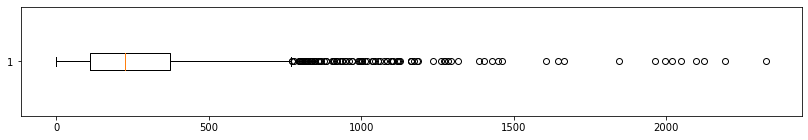

In [19]:
# abs difference
difference = abs((expected - predicted))
print('Mean Absolute Error = ', np.mean(difference))
# show boxplot
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert= False);
plt.show()